<a href="https://colab.research.google.com/github/khondokarsumaya/210101_diabtics_detectionwithKNN/blob/main/210101_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# GitHub URL for diabetes dataset
GITHUB_RAW_URL = "https://raw.githubusercontent.com/khondokarsumaya/210101_diabtics_detectionwithKNN/main/diabetes.csv"
# Drive path
DRIVE_PATH = "/content/drive/MyDrive/knn/diabetes.csv"

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
url = "https://raw.githubusercontent.com/khondokarsumaya/210101_Skin-Cancer-Detection-KNN/main/diabetes.csv"
df = pd.read_csv(url)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [54]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best Accuracy: 0.7655337864854058


In [58]:
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

In [59]:
y_pred = best_knn.predict(X_test)
y_prob = best_knn.predict_proba(X_test)[:,1]


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.6948051948051948
Precision: 0.5769230769230769
Recall: 0.5454545454545454
F1 Score: 0.5607476635514018


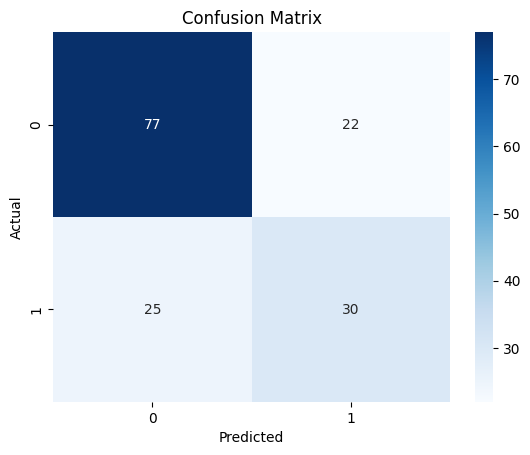

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [62]:
error_rate = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))


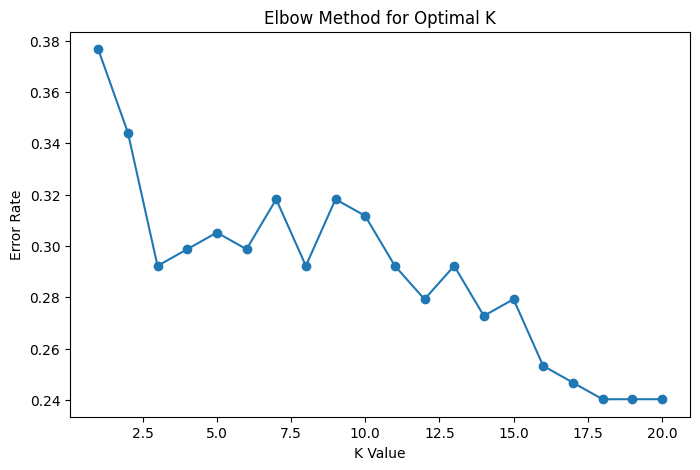

In [63]:
plt.figure(figsize=(8,5))
plt.plot(range(1,21), error_rate, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal K")
plt.show()


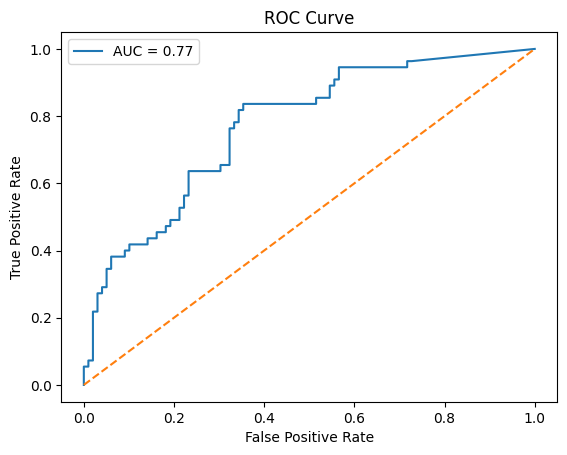

AUC Score: 0.7709825528007346


In [64]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)


In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


In [66]:
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_pca, y_train)


KNeighborsClassifier()

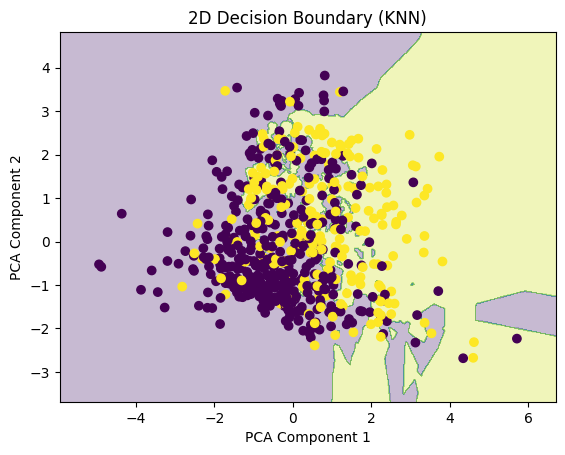

In [67]:
x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train)
plt.title("2D Decision Boundary (KNN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
